In [72]:
# Install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Location of processed control data
file_path = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/control/'
file_name = 'control_data.csv'

# Load the data in pd df
df = pd.read_csv(f'{file_path}{file_name}', index_col=False)
df.head()

,action,subject,frame,back_angle,left_angle,right_angle,back_1der,left_1der,right_1der,back_2der,left_2der,right_2der
0,1,1,1,0.309028,0.052406,0.991990,-0.059143,-0.018081,0.000857,0.024875,0.006771,-0.000014
1,1,1,2,0.212165,0.023802,0.993044,-0.034267,-0.011310,0.000843,0.024875,0.006771,-0.000014
2,1,1,3,0.251407,0.033033,0.993763,-0.009392,-0.004539,0.000830,0.024875,0.006771,-0.000014
3,1,1,4,0.232627,0.025384,0.994412,0.006291,-0.000403,0.000699,-0.008194,-0.002490,-0.000081
4,1,1,5,0.251839,0.028918,0.995454,0.002175,-0.001812,0.000567,0.005269,0.001213,-0.000224


Example of all subjects behaviour for one type of action


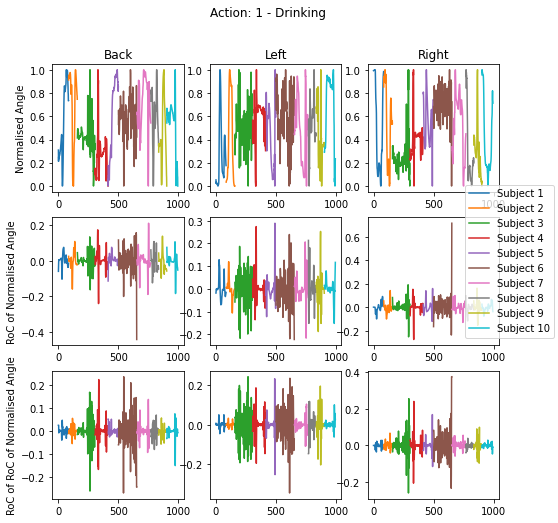

In [74]:
#
print("Example of all subjects behaviour for one type of action")

# Loop through each action and plot the angles
subject_nos = list(range(1,11))
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle(f'Action: 1 - Drinking')

for subject in subject_nos:

    angle_df = df.loc[
        (df['action'] == 1) & (df['subject'] == subject)]

    axs[0, 0].plot(angle_df['back_angle'])
    axs[0, 0].set_ylabel('Normalised Angle')
    axs[0, 0].set_title('Back')
    axs[0, 1].plot(angle_df['left_angle'])
    axs[0, 2].plot(angle_df['right_angle'])

    deriv = 1

    axs[1, 0].plot(angle_df[f'back_{deriv}der'])
    axs[1, 1].plot(angle_df[f'left_{deriv}der'])
    axs[1, 0].set_ylabel('RoC of Normalised Angle')
    axs[0, 1].set_title('Left')
    axs[1, 2].plot(angle_df[f'right_{deriv}der'])

    deriv = 2

    axs[2, 0].plot(angle_df[f'back_{deriv}der'])
    axs[2, 1].plot(angle_df[f'left_{deriv}der'])
    axs[2, 2].plot(angle_df[f'right_{deriv}der'], label=f'Subject {subject}')
    axs[2, 0].set_ylabel('RoC of RoC of Normalised Angle')
    axs[0, 2].set_title('Right')

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center right')

In [102]:
# Set window size of extraction
win_size = 40

In [103]:
def to_sequences(x, y, seq_size=1):
    '''Function to return windowed versions'''
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

In [105]:
# Loop through each action and subject
action_nos = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14]
subject_nos = list(range(1,11))
sensors = ['left_angle', 'right_angle', 'left_1der', 'right_1der', 'left_2der', 'right_2der']

extract_data = []
for action in action_nos:

    for subject in subject_nos:
        sample = df.loc[(df['action'] == action) & (df['subject'] == subject), sensors]
        win_samples, rubbish = to_sequences(sample, sample, win_size)
        # print(win_samples)
        extract_data.extend(win_samples)
np.array(extract_data).shape

# x_values = []
# y_values = []

# for i in range(len(sample)-win_size):
#     x_values.append(sample.iloc[i:(i+win_size)].values)
#     y_values.append(sample.iloc[i+win_size])

# x_values[0]
# extract_data


(9825, 40, 6)